<a href="https://colab.research.google.com/github/VictorOlegario/ARQUITETURA_COMPUTADORES_9E_MACKENZIE/blob/main/novo_projeto_ajustado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## ***2. Carregar a Base de Dados***

In [5]:

# Read the CSV file into a DataFrame
arquivo_csv = '/content/sample_data/base_final_vf.csv'
df = pd.read_csv(arquivo_csv)

# Print the first 5 rows of the DataFrame
df.head()

,ESPECIALISTA,Perfil,positivo,negativo,ganhou_bonus
0,1,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus
1,2,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus
2,3,influencia,Familia e legado,Relacionamento Interpessoal e Comunicação,com_bonus
3,4,dominancia,financeiro e estabilidade,Relacionamento Interpessoal e Comunicação,com_bonus
4,5,Conformidade,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus



# 3. Limpeza da Base

In [38]:
# Verificar e tratar valores ausentes# Codificar variáveis categóricas
df['Perfil_encoded'] = df['Perfil'].astype('category').cat.codes
df['positivo_encoded'] = df['positivo'].astype('category').cat.codes
df['negativo_encoded'] = df['negativo'].astype('category').cat.codes
df['ganhou_bonus_encoded'] = df['ganhou_bonus'].map({'com_bonus': 1, 'sem_bonus': 0})

df.head()

,ESPECIALISTA,Perfil,positivo,negativo,ganhou_bonus,Perfil_encoded,positivo_encoded,negativo_encoded,ganhou_bonus_encoded,probabilidade_bonus
0,1,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus,3,1,0,1,0.879091
1,2,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus,3,1,0,1,0.879091
2,3,influencia,Familia e legado,Relacionamento Interpessoal e Comunicação,com_bonus,3,2,3,1,0.437294
3,4,dominancia,financeiro e estabilidade,Relacionamento Interpessoal e Comunicação,com_bonus,2,3,3,1,0.000000
4,5,Conformidade,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus,0,1,0,1,0.734917



## 4. Divisão dos Dados

In [39]:
X = df[['Perfil_encoded', 'positivo_encoded', 'negativo_encoded']]
y = df['ganhou_bonus_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,ESPECIALISTA,Perfil,positivo,negativo,ganhou_bonus,Perfil_encoded,positivo_encoded,negativo_encoded,ganhou_bonus_encoded,probabilidade_bonus
0,1,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus,3,1,0,1,0.879091
1,2,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus,3,1,0,1,0.879091
2,3,influencia,Familia e legado,Relacionamento Interpessoal e Comunicação,com_bonus,3,2,3,1,0.437294
3,4,dominancia,financeiro e estabilidade,Relacionamento Interpessoal e Comunicação,com_bonus,2,3,3,1,0.000000
4,5,Conformidade,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,com_bonus,0,1,0,1,0.734917


## 5 Analise de dados

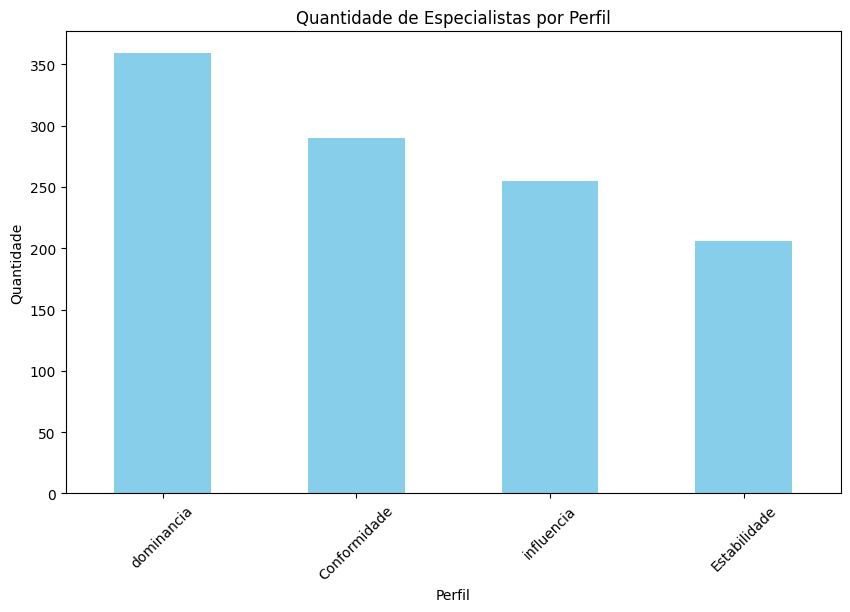

In [40]:
plt.figure(figsize=(10, 6))
df['Perfil'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Quantidade de Especialistas por Perfil')
plt.xlabel('Perfil')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

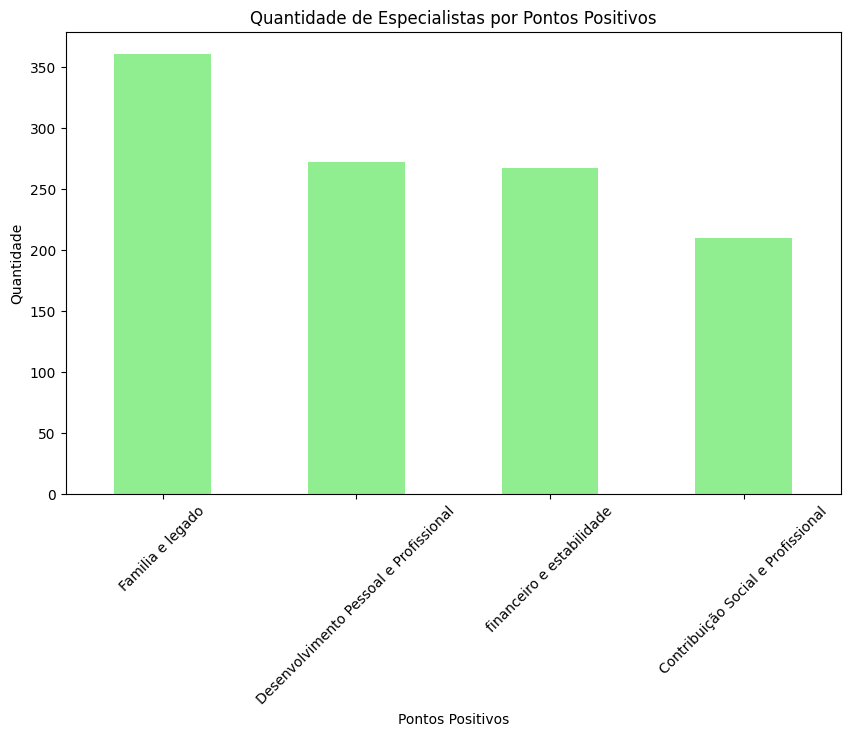

In [41]:
plt.figure(figsize=(10, 6))
df['positivo'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Quantidade de Especialistas por Pontos Positivos')
plt.xlabel('Pontos Positivos')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

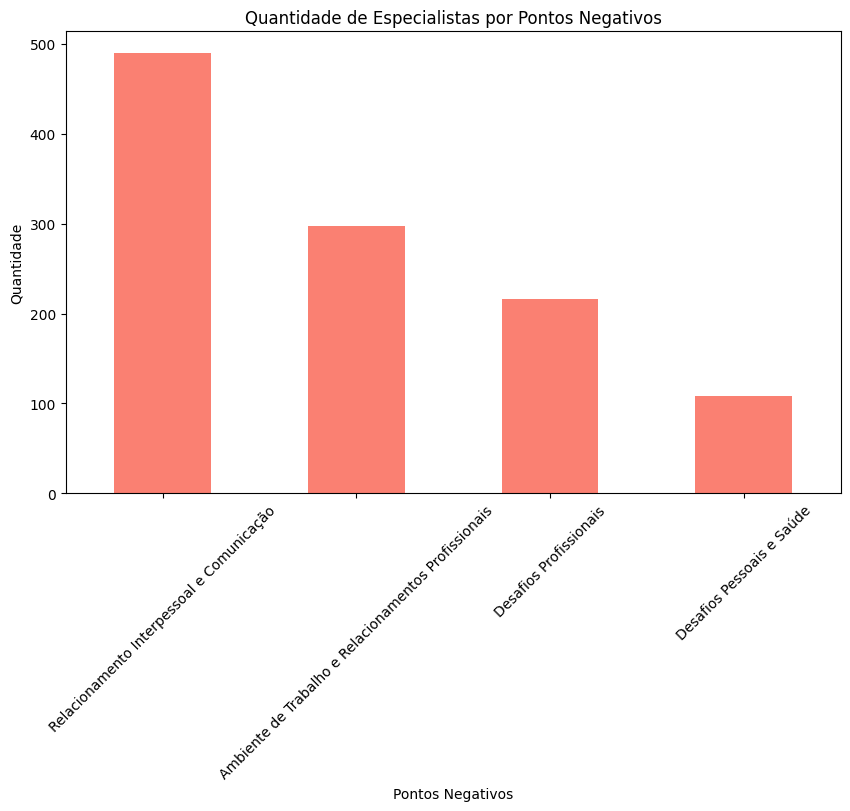

In [42]:
plt.figure(figsize=(10, 6))
df['negativo'].value_counts().plot(kind='bar', color='salmon')
plt.title('Quantidade de Especialistas por Pontos Negativos')
plt.xlabel('Pontos Negativos')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

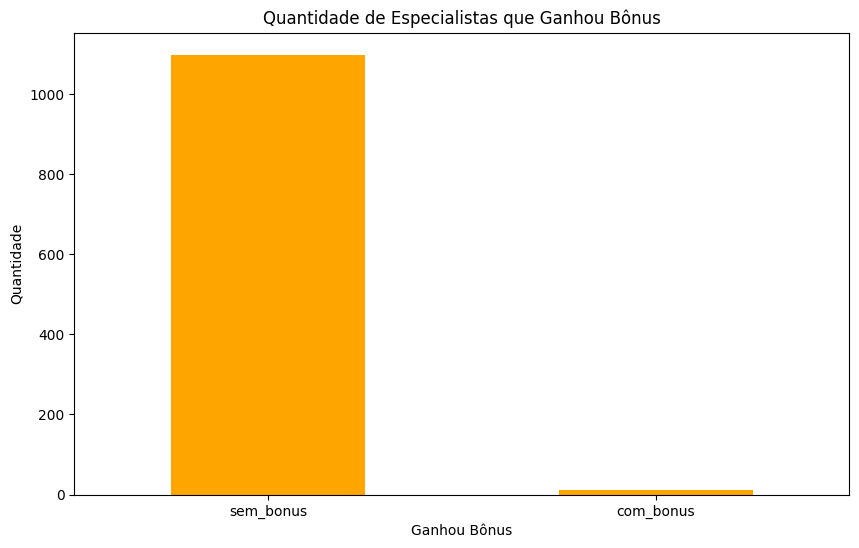

In [43]:
plt.figure(figsize=(10, 6))
df['ganhou_bonus'].value_counts().plot(kind='bar', color='orange')
plt.title('Quantidade de Especialistas que Ganhou Bônus')
plt.xlabel('Ganhou Bônus')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

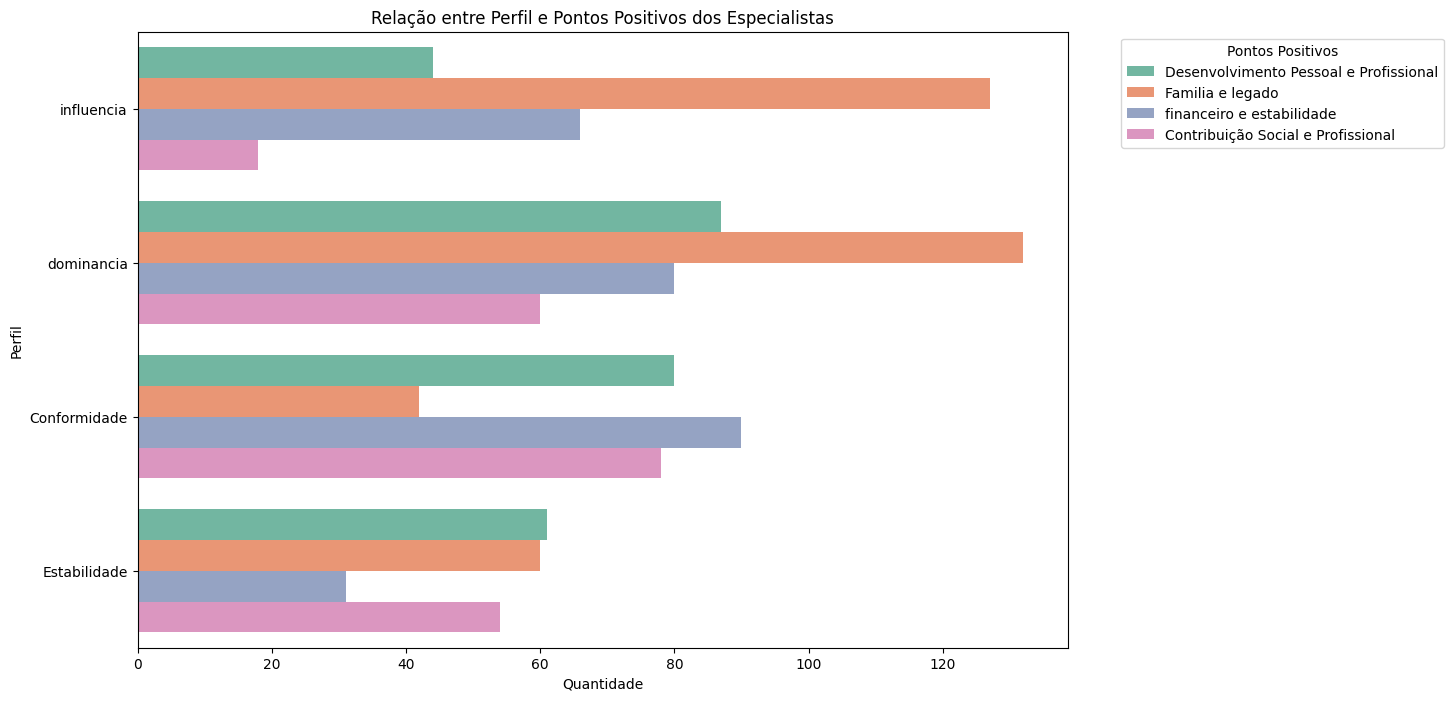

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Perfil', hue='positivo', data=df, palette='Set2')
plt.title('Relação entre Perfil e Pontos Positivos dos Especialistas')
plt.xlabel('Quantidade')
plt.ylabel('Perfil')
plt.legend(title='Pontos Positivos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

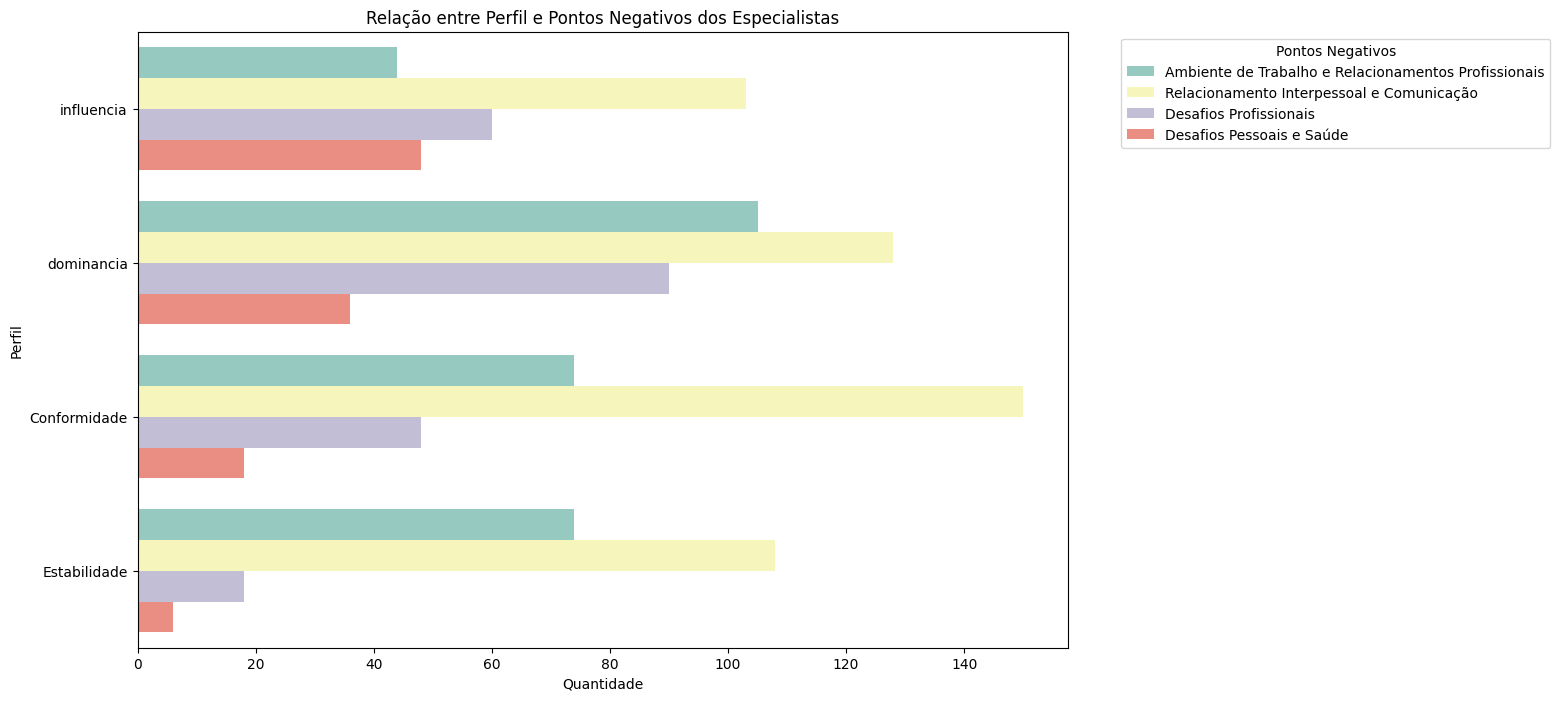

In [45]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Perfil', hue='negativo', data=df, palette='Set3')
plt.title('Relação entre Perfil e Pontos Negativos dos Especialistas')
plt.xlabel('Quantidade')
plt.ylabel('Perfil')
plt.legend(title='Pontos Negativos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

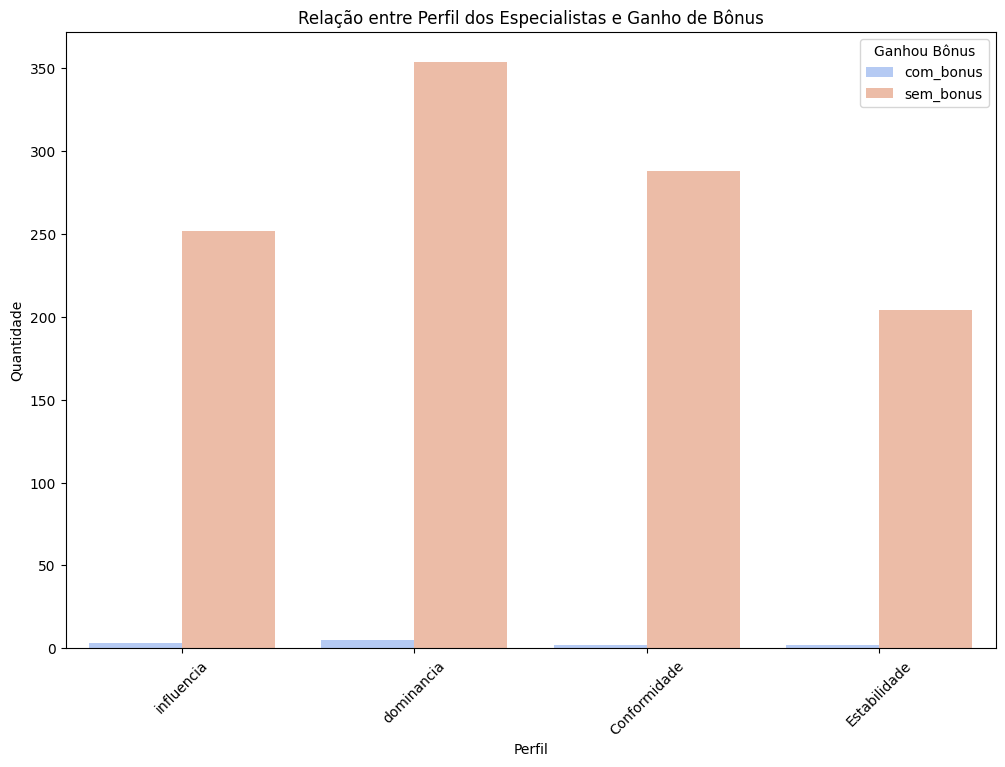

In [46]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Perfil', hue='ganhou_bonus', data=df, palette='coolwarm')
plt.title('Relação entre Perfil dos Especialistas e Ganho de Bônus')
plt.xlabel('Perfil')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Ganhou Bônus')
plt.show()

# 5. Criação e Treinamento do Modelo




In [14]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## 6. Avaliação do Modelo
**`negrito`**

In [15]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')
print(classification_report(y_test, y_pred))

Acurácia: 0.8468468468468469
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       220
           1       0.03      0.50      0.06         2

    accuracy                           0.85       222
   macro avg       0.51      0.68      0.49       222
weighted avg       0.99      0.85      0.91       222



## 7. Cálculo das Médias de Probabilidade


---



In [24]:
# Adicionar a probabilidade de receber um bônus ao dataframe
df['probabilidade_bonus'] = modelo.predict_proba(X)[:, 1]

# Calcular médias de probabilidade por perfil, pontos positivos e negativos
media_perfil = df.groupby('Perfil')['probabilidade_bonus'].mean()
media_positivo = df.groupby('positivo')['probabilidade_bonus'].mean()
media_negativo = df.groupby('negativo')['probabilidade_bonus'].mean()

print('Médias de Probabilidade de Receber um Bônus:\n')
print(f'media_perfil: \n{media_perfil}\n')
print(f'media_positivo:\n {media_positivo}\n')
print(f'media_negativo: \n{media_negativo}\n')


Médias de Probabilidade de Receber um Bônus:

media_perfil: 
Perfil
Conformidade    0.096299
Estabilidade    0.094097
dominancia      0.091874
influencia      0.132187
Name: probabilidade_bonus, dtype: float64

media_positivo:
 positivo
Contribuição Social e Profissional        0.000000
Desenvolvimento Pessoal e Profissional    0.227833
Familia e legado                          0.073892
financeiro e estabilidade                 0.094966
Name: probabilidade_bonus, dtype: float64

media_negativo: 
negativo
Ambiente de Trabalho e Relacionamentos Profissionais    0.258294
Desafios Pessoais e Saúde                               0.000000
Desafios Profissionais                                  0.000000
Relacionamento Interpessoal e Comunicação               0.076253
Name: probabilidade_bonus, dtype: float64



## 8. Geração de Gráficos


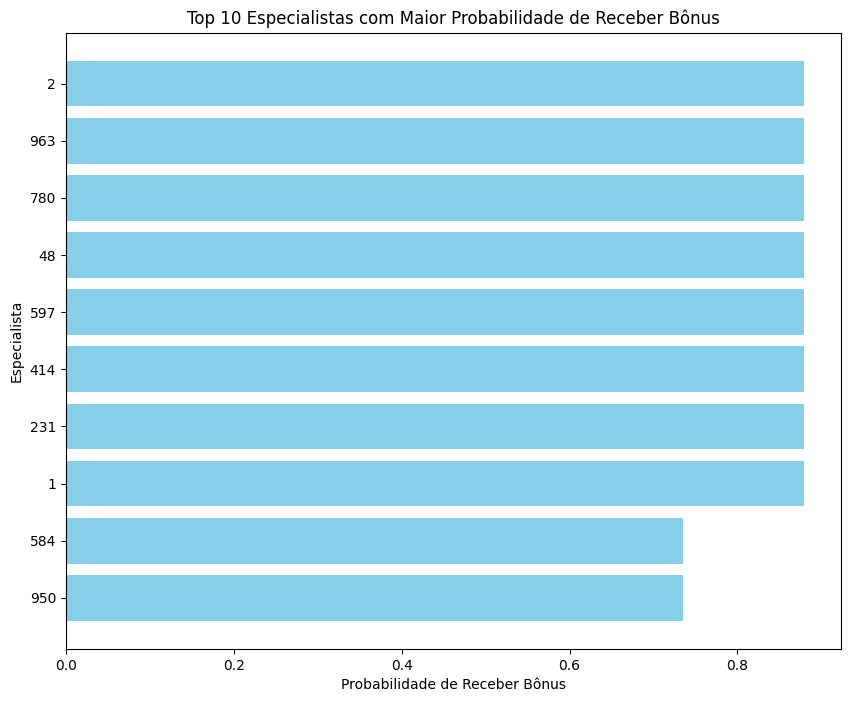

In [29]:
# Selecionar os top 10 especialistas com maiores probabilidades de receber um bônus
top_especialistas = df.sort_values(by='probabilidade_bonus', ascending=False).head(10)

# Preparar dados para o gráfico
top_especialistas_sorted = top_especialistas.sort_values(by='probabilidade_bonus')
especialistas_labels = top_especialistas_sorted['ESPECIALISTA'].astype(str)
probabilidades = top_especialistas_sorted['probabilidade_bonus']

# Criar o gráfico
plt.figure(figsize=(10, 8))
plt.barh(especialistas_labels, probabilidades, color='skyblue')
plt.xlabel('Probabilidade de Receber Bônus')
plt.ylabel('Especialista')
plt.title('Top 10 Especialistas com Maior Probabilidade de Receber Bônus')
plt.show()

In [32]:
# Selecionar colunas relevantes para mostrar os pontos positivos e negativos dos 10 melhores especialistas
infro_espec = top_especialistas_sorted[['ESPECIALISTA', 'Perfil', 'positivo', 'negativo', 'probabilidade_bonus']]

# Exibir as informações
infro_espec


,ESPECIALISTA,Perfil,positivo,negativo,probabilidade_bonus
949,950,Conformidade,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.734917
583,584,Conformidade,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.734917
0,1,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
230,231,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
413,414,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
596,597,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
47,48,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
779,780,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
962,963,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091
1,2,influencia,Desenvolvimento Pessoal e Profissional,Ambiente de Trabalho e Relacionamentos Profiss...,0.879091


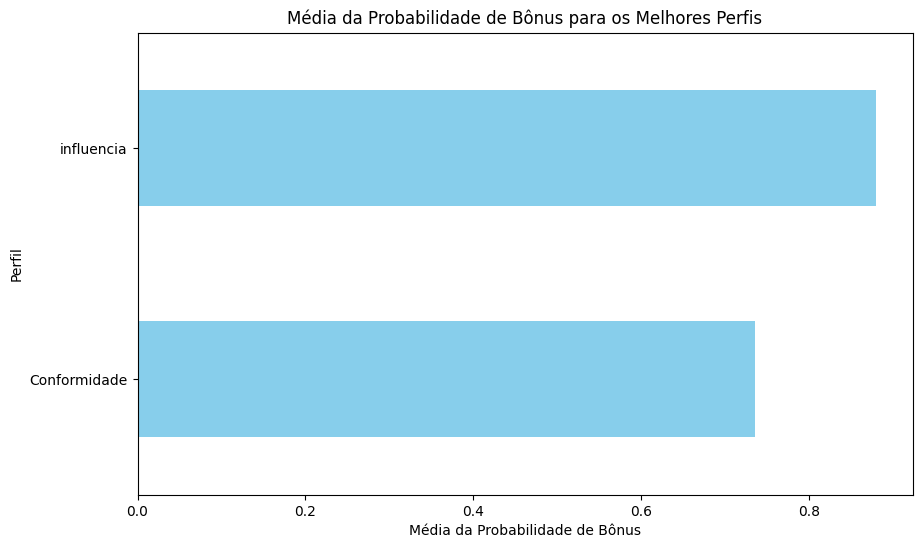

In [34]:
# Calcular a média da probabilidade de bônus para cada perfil entre os top 10 especialistas
media_prob= top_especialistas.groupby('Perfil')['probabilidade_bonus'].mean().sort_values()

# Criar o gráfico
plt.figure(figsize=(10, 6))
media_prob.plot(kind='barh', color='skyblue')
plt.xlabel('Média da Probabilidade de Bônus')
plt.ylabel('Perfil')
plt.title('Média da Probabilidade de Bônus para os Melhores Perfis')
plt.show()

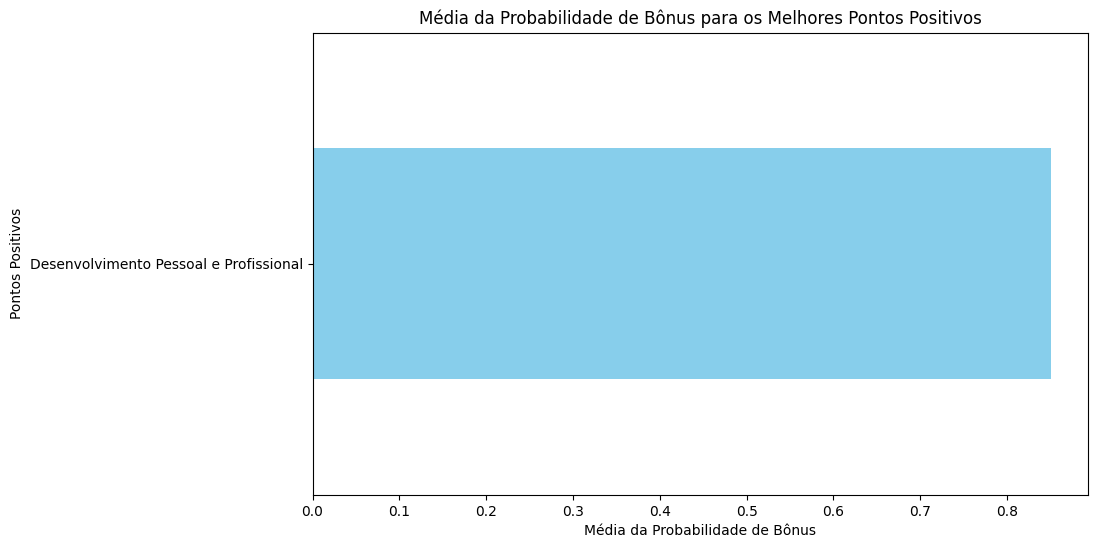

In [36]:
# Calcular a média da probabilidade de bônus para cada ponto positivo entre os top 10 especialistas
med_prob = top_especialistas.groupby('positivo')['probabilidade_bonus'].mean().sort_values()

# Criar o gráfico
plt.figure(figsize=(10, 6))
med_prob.plot(kind='barh', color='skyblue')
plt.xlabel('Média da Probabilidade de Bônus')
plt.ylabel('Pontos Positivos')
plt.title('Média da Probabilidade de Bônus para os Melhores Pontos Positivos')
plt.show()

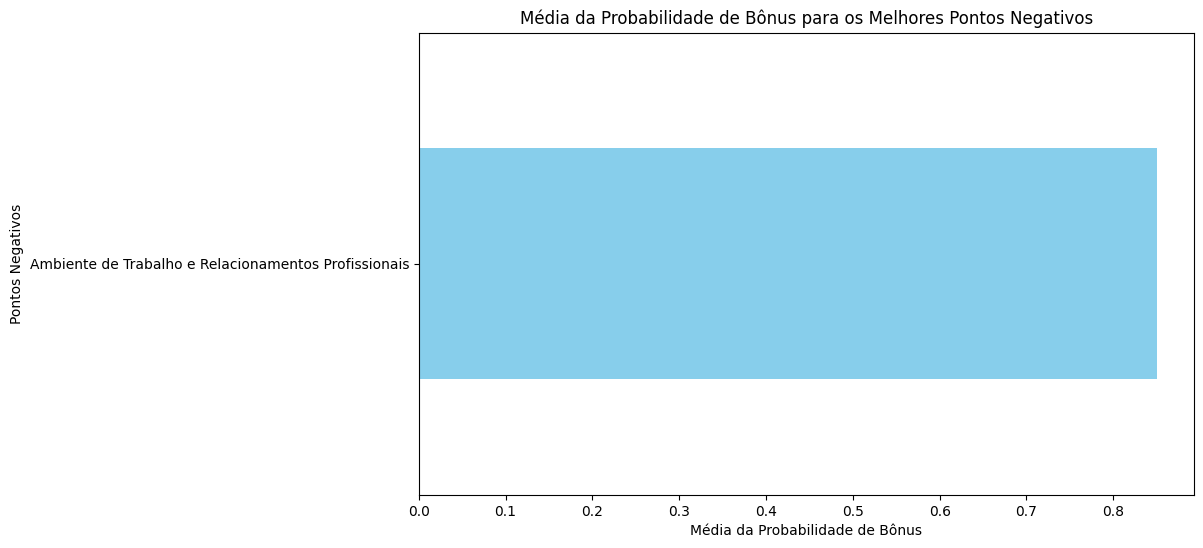

In [37]:
# Calcular a média da probabilidade de bônus para cada ponto negativo entre os top 10 especialistas
media_probabilidade_por_negativo = top_especialistas.groupby('negativo')['probabilidade_bonus'].mean().sort_values()

# Criar o gráfico
plt.figure(figsize=(10, 6))
media_probabilidade_por_negativo.plot(kind='barh', color='skyblue')
plt.xlabel('Média da Probabilidade de Bônus')
plt.ylabel('Pontos Negativos')
plt.title('Média da Probabilidade de Bônus para os Melhores Pontos Negativos')
plt.show()